In [1]:
!pip install git+https://github.com/netbrainml/nbml.git
from nbml.pytorch import *
from nbml.workshops.cifar100.utils import *
from IPython.display import clear_output
clear_output()

In [2]:
x_train, x_test, y_train, y_test = getCIFAR100()
tdl, vdl = torchCIFAR100(x_train, x_test, y_train, y_test, bs=128)

169009152/169001437 [==============================] - 13s 0us/step
arg_0: (50000, 32, 32, 3)
arg_1: (10000, 32, 32, 3)
arg_2: (50000, 1)
arg_3: (10000, 1)
arg_0: torch.Size([50000, 3, 32, 32])
arg_1: torch.Size([10000, 3, 32, 32])
arg_2: torch.Size([50000])
arg_3: torch.Size([10000])


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from fastai.torch_core import Module

class noop(Module):
    def __call__(self, x): return x

class Flatten(Module):
    def __call__(self,x): return torch.flatten(x, start_dim=1)

In [4]:
class resblock(Module):
    def __init__(self, ni, nf, mp=False):
        self.res = nn.Conv2d(ni,nf,3, padding=1)
        self.id = nn.Conv2d(ni,nf,1) if ni!=nf else noop()
        self.act = nn.ReLU(inplace=True)
        self.mp = nn.MaxPool2d(2,2) if mp else noop()
    def forward(self,x): return self.mp(self.act(self.res(x)+self.id(x)))
    
class ResConv(BasicTrainableClassifier):
    def __init__(self,ni, nc):
        super().__init__()
        self.model = nn.Sequential(resblock(ni,64),
                                   resblock(64,64,mp=True),
                                   resblock(64,128),
                                   resblock(128,128,mp=True),
                                   resblock(128,256),
                                   resblock(256,256,mp=True),
                                   nn.AdaptiveMaxPool2d(1),
                                   Flatten(),
                                   nn.Linear(256, nc),
                                  )
        
    def forward(self,x): return self.model(x)

In [5]:
resnet = ResConv(3,100).cuda()

In [6]:
resnet.fit(tdl, vdl, cbs=True, epochs=10)

100% (391 of 391) |######################| Elapsed Time: 0:00:10 Time:  0:00:10
100% (391 of 391) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 1:
	Train Loss: 3.359 | Train Acc: 19.53%
	 Val. Loss: 3.428 |  Val. Acc: 18.52%


100% (391 of 391) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (391 of 391) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 2:
	Train Loss: 2.793 | Train Acc: 30.03%
	 Val. Loss: 2.933 |  Val. Acc: 27.50%


100% (391 of 391) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (391 of 391) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 3:
	Train Loss: 2.381 | Train Acc: 38.70%
	 Val. Loss: 2.611 |  Val. Acc: 33.82%


100% (391 of 391) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (391 of 391) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 4:
	Train Loss: 2.136 | Train Acc: 44.18%
	 Val. Loss: 2.458 |  Val. Acc: 37.04%


100% (391 of 391) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (391 of 391) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 5:
	Train Loss: 1.832 | Train Acc: 51.37%
	 Val. Loss: 2.300 |  Val. Acc: 40.90%


100% (391 of 391) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (391 of 391) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 6:
	Train Loss: 1.718 | Train Acc: 54.38%
	 Val. Loss: 2.304 |  Val. Acc: 40.99%


100% (391 of 391) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (391 of 391) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 7:
	Train Loss: 1.432 | Train Acc: 60.69%
	 Val. Loss: 2.219 |  Val. Acc: 43.67%


100% (391 of 391) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (391 of 391) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 8:
	Train Loss: 1.246 | Train Acc: 65.05%
	 Val. Loss: 2.281 |  Val. Acc: 44.34%


100% (391 of 391) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (391 of 391) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 9:
	Train Loss: 1.091 | Train Acc: 69.43%
	 Val. Loss: 2.312 |  Val. Acc: 43.54%


100% (391 of 391) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (391 of 391) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 10:
	Train Loss: 0.976 | Train Acc: 72.41%
	 Val. Loss: 2.448 |  Val. Acc: 43.60%


In [7]:
class denseblock(Module):
    def __init__(self, ni, nf, mp=False):
        self.res = nn.Conv2d(ni,nf,3, padding=1)
        self.id = nn.Conv2d(ni,nf,1) if ni!=nf else noop()
        self.act = nn.ReLU(inplace=True)
        self.mp = nn.MaxPool2d(2,2) if mp else noop()
    def forward(self,x): return self.mp(self.act(torch.cat([self.res(x),self.id(x)], dim=1)))
    
class DenseConv(BasicTrainableClassifier):
    def __init__(self,ni, nc):
        super().__init__()
        self.model = nn.Sequential(denseblock(ni,64),
                                   nn.Conv2d(128,128,3),
                                   nn.ReLU(inplace=True),
                                   denseblock(128,128,mp=True),
                                   nn.Conv2d(256,256,3),
                                   nn.ReLU(inplace=True),
                                   denseblock(256,512,mp=True),
                                   nn.AdaptiveMaxPool2d(1),
                                   Flatten(),
                                   nn.Linear(1024, nc),
                                  )
        
    def forward(self,x): return self.model(x)

In [8]:
densenet = DenseConv(3,100).cuda()

In [9]:
densenet.fit(tdl, vdl, cbs=True, epochs=10)

100% (391 of 391) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 1:
	Train Loss: 3.622 | Train Acc: 14.66%
	 Val. Loss: 3.658 |  Val. Acc: 14.50%


100% (391 of 391) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 2:
	Train Loss: 3.094 | Train Acc: 24.68%
	 Val. Loss: 3.178 |  Val. Acc: 23.78%


100% (391 of 391) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 3:
	Train Loss: 2.759 | Train Acc: 30.90%
	 Val. Loss: 2.888 |  Val. Acc: 28.88%


100% (391 of 391) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 4:
	Train Loss: 2.498 | Train Acc: 36.53%
	 Val. Loss: 2.713 |  Val. Acc: 32.79%


100% (391 of 391) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 5:
	Train Loss: 2.193 | Train Acc: 43.31%
	 Val. Loss: 2.468 |  Val. Acc: 37.73%


100% (391 of 391) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 6:
	Train Loss: 1.982 | Train Acc: 48.02%
	 Val. Loss: 2.359 |  Val. Acc: 39.89%


100% (391 of 391) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 7:
	Train Loss: 1.866 | Train Acc: 50.60%
	 Val. Loss: 2.327 |  Val. Acc: 41.19%


100% (391 of 391) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 8:
	Train Loss: 1.764 | Train Acc: 52.83%
	 Val. Loss: 2.325 |  Val. Acc: 41.49%


100% (391 of 391) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 9:
	Train Loss: 1.587 | Train Acc: 57.55%
	 Val. Loss: 2.246 |  Val. Acc: 43.25%


100% (391 of 391) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (79 of 79) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Epoch 10:
	Train Loss: 1.454 | Train Acc: 60.70%
	 Val. Loss: 2.221 |  Val. Acc: 44.30%


In [10]:
def conv(nc, nf, ks=3, stride=1, pad=0, mp=False):
    return nn.Sequential(nn.Conv2d(nc,nf,ks,stride,pad),
                         nn.ReLU(inplace=True),
                         nn.MaxPool2d(2,2) if mp else noop())    
class ConvNet(BasicTrainableClassifier):
    def __init__(self,ni, nc):
        super().__init__()
        self.model = nn.Sequential(conv(ni,64),
                                   conv(64,64, mp=True),
                                   conv(64,128),
                                   conv(128,128,mp=True),
                                   conv(128,256, pad=1),
                                   conv(256,256,mp=True),
                                   nn.AdaptiveMaxPool2d(1),
                                   Flatten(),
                                   nn.Linear(256, nc),
                                  )
        
    def forward(self,x): return self.model(x)

In [11]:
noskip = ConvNet(3,100).cuda()

In [12]:
noskip.fit(tdl, vdl, cbs=True, epochs=10)

100% (391 of 391) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 1:
	Train Loss: 3.769 | Train Acc: 11.94%
	 Val. Loss: 3.794 |  Val. Acc: 11.04%


100% (391 of 391) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 2:
	Train Loss: 3.483 | Train Acc: 16.39%
	 Val. Loss: 3.528 |  Val. Acc: 15.99%


100% (391 of 391) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 3:
	Train Loss: 3.221 | Train Acc: 21.59%
	 Val. Loss: 3.318 |  Val. Acc: 20.51%


100% (391 of 391) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 4:
	Train Loss: 2.986 | Train Acc: 25.89%
	 Val. Loss: 3.119 |  Val. Acc: 24.28%


100% (391 of 391) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 5:
	Train Loss: 2.830 | Train Acc: 29.31%
	 Val. Loss: 3.023 |  Val. Acc: 25.86%


100% (391 of 391) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 6:
	Train Loss: 2.692 | Train Acc: 31.97%
	 Val. Loss: 2.930 |  Val. Acc: 28.24%


100% (391 of 391) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 7:
	Train Loss: 2.557 | Train Acc: 35.00%
	 Val. Loss: 2.862 |  Val. Acc: 29.07%


100% (391 of 391) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 8:
	Train Loss: 2.414 | Train Acc: 37.93%
	 Val. Loss: 2.840 |  Val. Acc: 30.74%


100% (391 of 391) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 9:
	Train Loss: 2.356 | Train Acc: 38.86%
	 Val. Loss: 2.797 |  Val. Acc: 31.20%


100% (391 of 391) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 10:
	Train Loss: 2.246 | Train Acc: 41.35%
	 Val. Loss: 2.799 |  Val. Acc: 31.27%


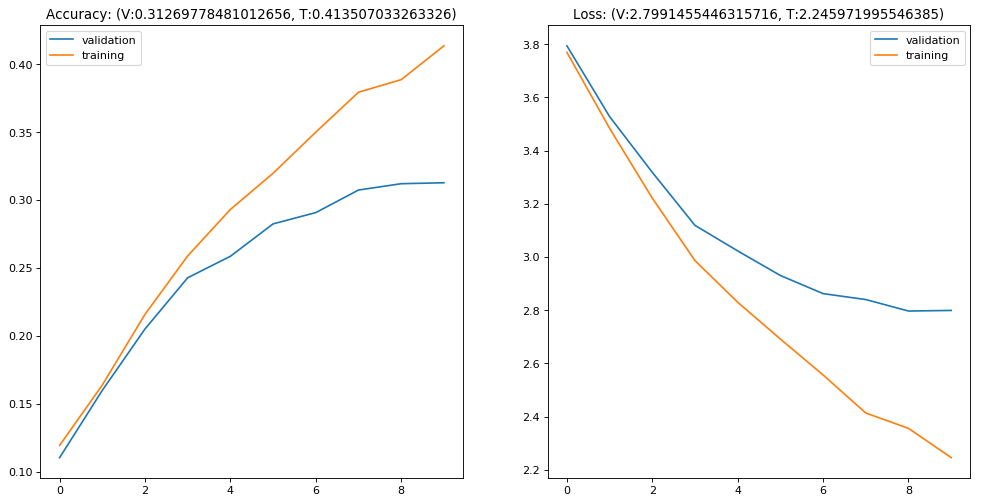

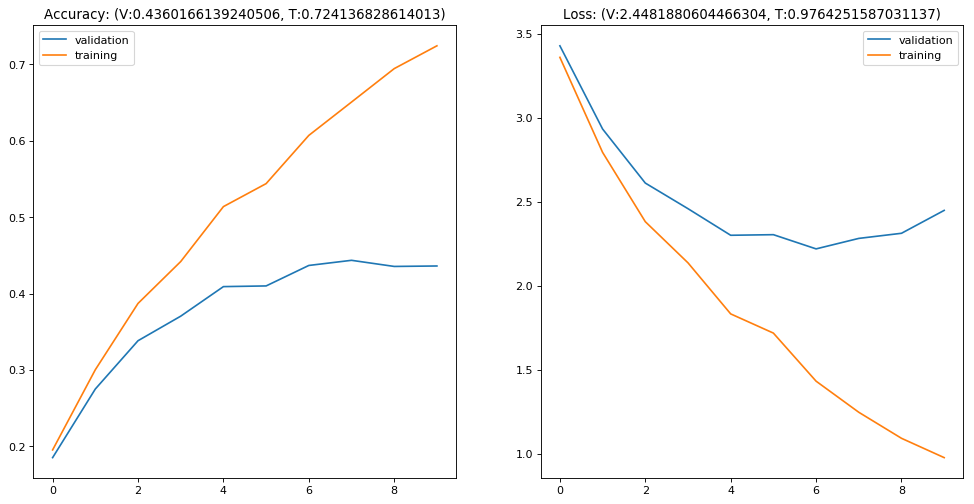

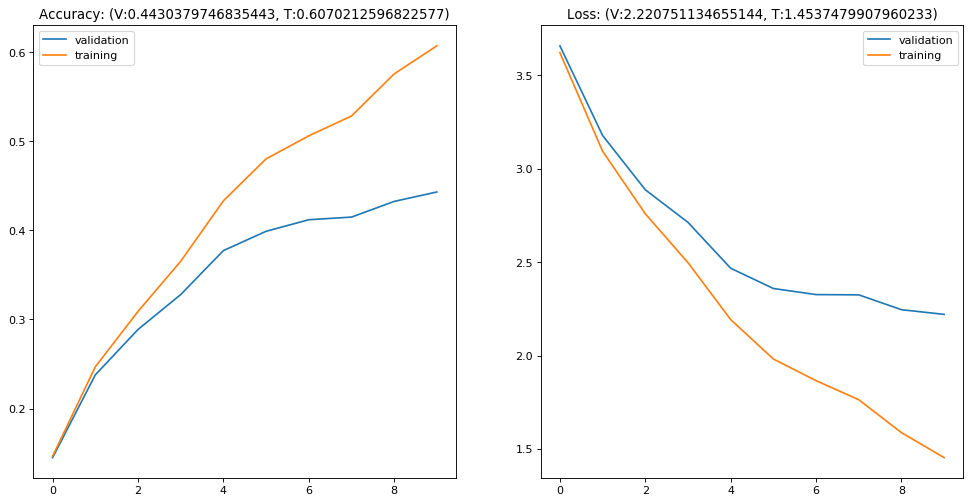

In [13]:
noskip.plot
resnet.plot
densenet.plot